<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

In [3]:
df = pd.read_excel(path)
df.head(20)

,Customer ID,Age,Gender,Total Spent,Converted,Comments,Purchased Category,Stock,Region,Income Level,Discount Availed,Customer Tenure (Years),Campaign,Return Rate (%),Website Visit Frequency,Average Cart Value
0,1,23,F,150,1,Satisfied with the service,Clothing,4,East,Medium,46,4,Winter Sale,2.981829,3,378.00
1,2,35,M,600,1,Needs improvement in delivery,Beauty,86,West,Low,61,12,Summer Sale,1.833412,6,315.52
2,3,45,F,800,0,Regular customer,Books,24,North,Medium,50,12,Black Friday,6.547401,0,250.69
3,4,52,M,200,0,Occasional buyer,Beauty,10,East,Medium,54,7,Winter Sale,3.923717,1,222.58
4,5,29,F,300,1,High spender,Books,47,East,Medium,63,12,Winter Sale,2.306644,4,298.68
5,6,41,M,450,0,Average experience,Books,86,West,Medium,2,13,NaN,3.238817,3,158.28
6,7,38,F,670,1,Prefers online shopping,Home Goods,69,North,Low,50,8,Winter Sale,2.738895,1,290.23
7,8,27,M,120,1,New customer,Home Goods,0,North,Low,6,3,Winter Sale,5.268858,7,181.40
8,9,50,F,500,0,Loyal to the brand,Electronics,86,East,Medium,20,14,Winter Sale,6.164246,3,296.54
9,10,33,M,750,1,High conversion rate,Clothing,45,South,Medium,72,1,NaN,6.775497,4,237.93


In [13]:
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop('Response', axis=1)
y = df('Response')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

KeyError: "['Response'] not found in axis"

In [14]:
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop('Response', axis=1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

KeyError: "['Response'] not found in axis"

In [16]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
df['GMM_Cluster'] = gmm.fit_predict(df[['Customer Tenure (Years)', 'Total Spent']])
print(df['GMM_Cluster'].value_counts())

GMM_Cluster
0    12
1     8
Name: count, dtype: int64


In [19]:
!pip install matplotlib-venn

In [20]:
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(xgb_model, X_train, ['Age'])
plt.title('Partial Dependence of Age on Conversion')
plt.show()

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/usr/local/lib/python3.10/dist-packages/sklearn/inspection/__init__.py)

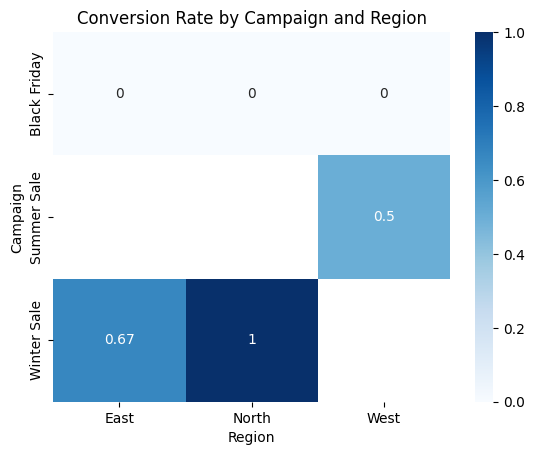

In [21]:
import matplotlib.pyplot as ply
import seaborn as sns

campaign_region_conversion = pd.pivot_table(df, values='Converted', index='Campaign', columns='Region', aggfunc='mean')
sns.heatmap(campaign_region_conversion, annot=True, cmap='Blues')
plt.title('Conversion Rate by Campaign and Region')
plt.show()

In [22]:
df['CLV'] = df['Customer Tenure (Years)'] * df['Average Cart Value']
print(df[['Customer ID', 'CLV']])

    Customer ID      CLV
0             1  1512.00
1             2  3786.24
2             3  3008.28
3             4  1558.06
4             5  3584.16
5             6  2057.64
6             7  2321.84
7             8   544.20
8             9  4151.56
9            10   237.93
10           11   883.52
11           12   367.18
12           13  1785.92
13           14  1166.84
14           15   656.58
15           16  4052.72
16           17  2113.74
17           18  2642.64
18           19  2256.60
19           20   938.24
